# Paper ST-Sloping - L1SO Result Analysis

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['figure.facecolor'] = 'white'

## Load Results

In [2]:
l1so_4beat_df = pd.read_csv('result/bin_4beats_l1so.csv', index_col=0)
l1so_6beat_df = pd.read_csv('result/bin_6beats_l1so.csv', index_col=0)
l1so_8beat_df = pd.read_csv('result/bin_8beats_l1so.csv', index_col=0)
l1so_10beat_df = pd.read_csv('result/bin_10beats_l1so.csv', index_col=0)
l1so_16beat_df = pd.read_csv('result/bin_16beats_l1so.csv', index_col=0)
l1so_32beat_df = pd.read_csv('result/bin_32beats_l1so.csv', index_col=0)
l1so_64beat_df = pd.read_csv('result/bin_64beats_l1so.csv', index_col=0)

In [3]:
sec_array = ["4beats", "6beats", "8beats", "10beats", "16beats", "32beats", "64beats"]
l1so_array = [
    l1so_4beat_df, l1so_6beat_df, l1so_8beat_df,
    l1so_10beat_df, l1so_16beat_df, l1so_32beat_df, l1so_64beat_df
]

## Preview

In [4]:
l1so_10beat_df.head(3)

,accuracy,specificity,precision,recall,f1
0,0.822469,0.177531,0.853986,0.822469,0.742350
1,0.802539,0.197461,0.841530,0.802539,0.714624
2,0.916373,0.080753,0.844390,0.916373,0.878910


## Processing

In [5]:
df_accuracy = pd.DataFrame()
for df, sec in zip(l1so_array, sec_array):
    df_accuracy[sec] =          df['accuracy']

df_specificity = pd.DataFrame()
for df, sec in zip(l1so_array, sec_array):
    df_specificity[sec] =       df['specificity']

df_precision = pd.DataFrame()
for df, sec in zip(l1so_array, sec_array):
    df_precision[sec] =         df['precision']

df_recall = pd.DataFrame()
for df, sec in zip(l1so_array, sec_array):
    df_recall[sec] =            df['recall']

df_f1 = pd.DataFrame()
for df, sec in zip(l1so_array, sec_array):
    df_f1[sec] =                df['f1']

metrics = pd.DataFrame()
for df, sec in zip(l1so_array, sec_array):
    row = dict()
    row['aaa_name'] = sec
    row['acc_avg'] =                 df["accuracy"].mean()
    row['acc_sd'] =                  df["accuracy"].std()
    row['specificity_avg'] =         df["specificity"].mean()
    row['specificity_sd'] =          df["specificity"].std()
    row['precision_avg'] =           df["precision"].mean()
    row['precision_sd'] =            df["precision"].std()
    row['recall_avg'] =              df["recall"].mean()
    row['recall_sd'] =               df["recall"].std()
    row['f1_avg'] =                  df["f1"].mean()
    row['f1_sd'] =                   df["f1"].std()
    metrics = metrics.append(row, ignore_index=True)

## Box plot table

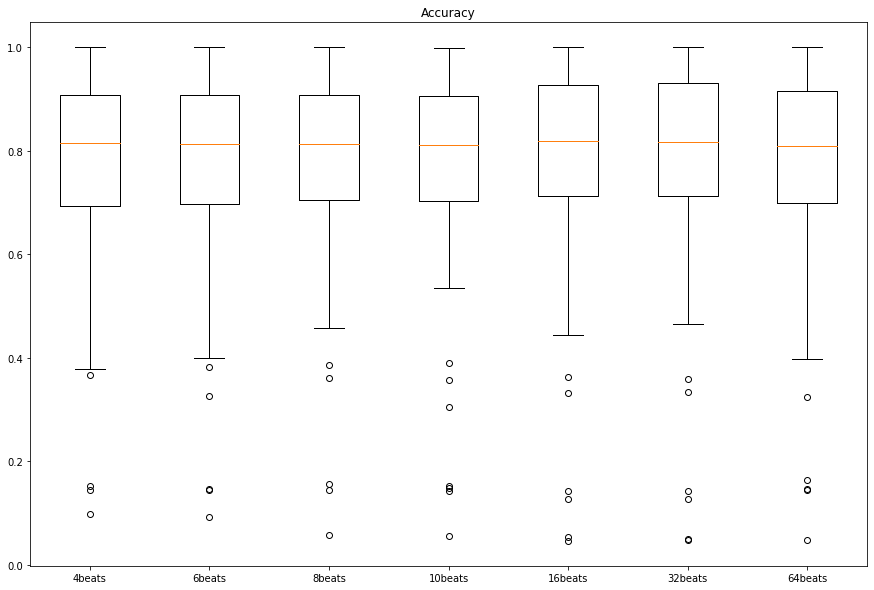

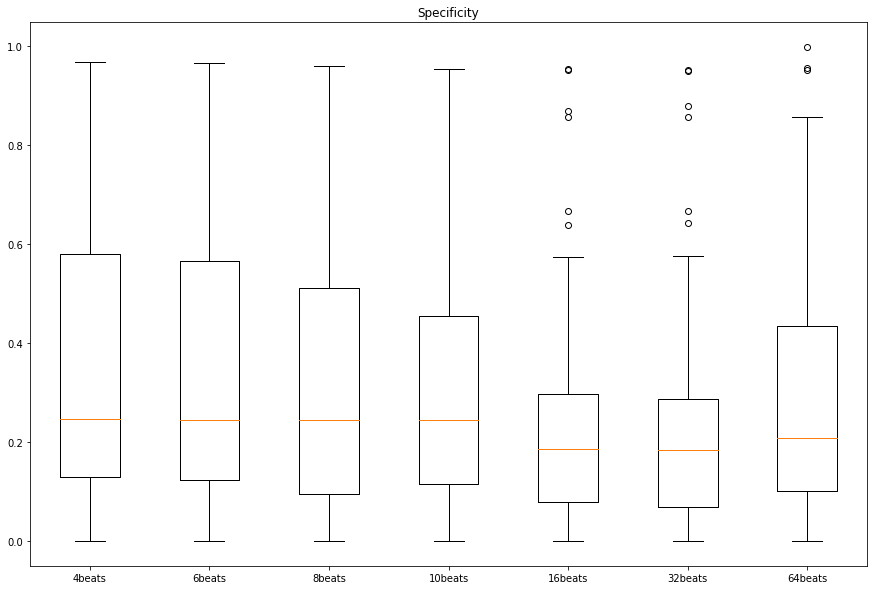

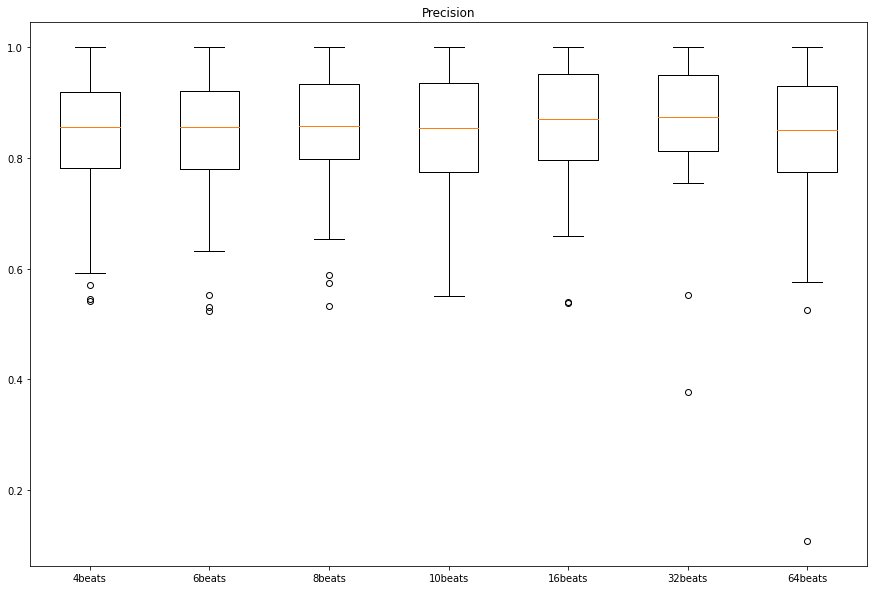

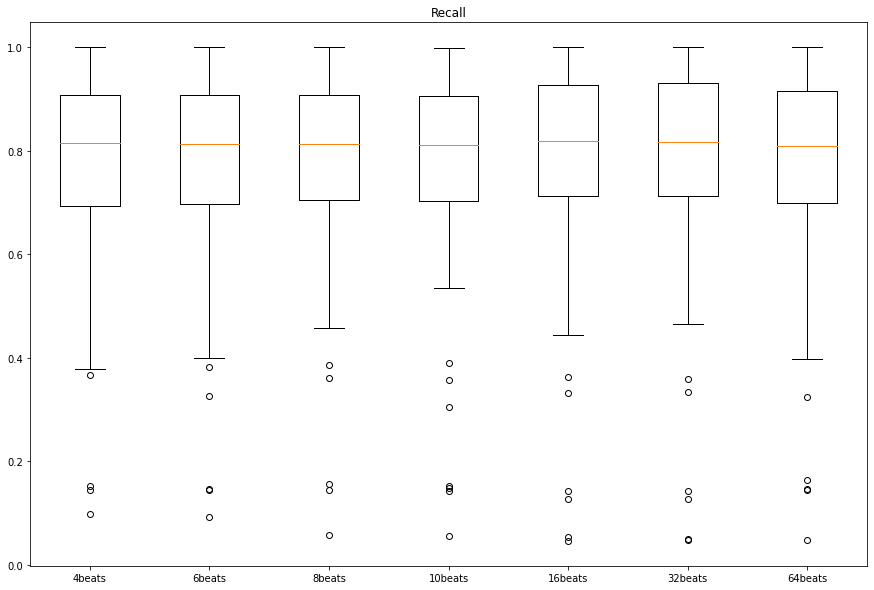

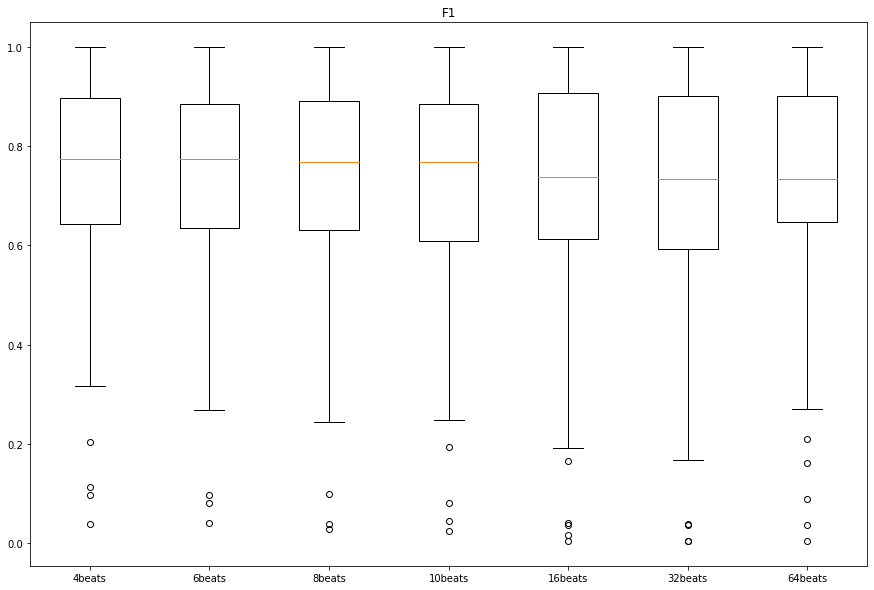

In [6]:
plt.boxplot(x=df_accuracy, labels=df_accuracy.columns)
plt.title("Accuracy")
plt.show()

plt.boxplot(x=df_specificity, labels=df_specificity.columns)
plt.title("Specificity")
plt.show()

plt.boxplot(x=df_precision, labels=df_precision.columns)
plt.title("Precision")
plt.show()

plt.boxplot(x=df_recall, labels=df_recall.columns)
plt.title("Recall")
plt.show()

plt.boxplot(x=df_f1, labels=df_f1.columns)
plt.title("F1")
plt.show()

## Summary table

In [7]:
metrics.to_csv("result_aggregate/aggregate_result_bin_l1po.csv")
metrics.head(10)

,aaa_name,acc_avg,acc_sd,specificity_avg,specificity_sd,precision_avg,precision_sd,recall_avg,recall_sd,f1_avg,f1_sd
0,4beats,0.763106,0.213406,0.330876,0.274726,0.845678,0.118050,0.763106,0.213406,0.727933,0.232038
1,6beats,0.759807,0.217721,0.328760,0.272292,0.846302,0.117208,0.759807,0.217721,0.724650,0.232897
2,8beats,0.763670,0.216189,0.333287,0.283232,0.854810,0.110727,0.763670,0.216189,0.727825,0.236747
3,10beats,0.751050,0.232306,0.315703,0.267253,0.846628,0.117094,0.751050,0.232306,0.710902,0.250037
4,16beats,0.764898,0.244633,0.249377,0.245979,0.862114,0.105161,0.764898,0.244633,0.701654,0.273714
5,32beats,0.761104,0.245856,0.235658,0.245515,0.866992,0.109946,0.761104,0.245856,0.697289,0.273511
6,64beats,0.749979,0.229986,0.302834,0.277668,0.835241,0.150513,0.749979,0.229986,0.708333,0.245770


## Summary table mean only

In [8]:
metrics_mean_only = metrics[["aaa_name", "acc_avg", "specificity_avg", "precision_avg", "recall_avg", "f1_avg"]]
metrics_mean_only.to_csv("result_aggregate/aggregate_mean_only_result_bin_l1po.csv", sep=";")
metrics_mean_only.head(10)

,aaa_name,acc_avg,specificity_avg,precision_avg,recall_avg,f1_avg
0,4beats,0.763106,0.330876,0.845678,0.763106,0.727933
1,6beats,0.759807,0.328760,0.846302,0.759807,0.724650
2,8beats,0.763670,0.333287,0.854810,0.763670,0.727825
3,10beats,0.751050,0.315703,0.846628,0.751050,0.710902
4,16beats,0.764898,0.249377,0.862114,0.764898,0.701654
5,32beats,0.761104,0.235658,0.866992,0.761104,0.697289
6,64beats,0.749979,0.302834,0.835241,0.749979,0.708333
